<a href="https://colab.research.google.com/github/Khushgod/BA_customer_booking/blob/main/BA_customer_booking_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("customer_booking_ba.csv", encoding = "ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0



Training set size: (40000, 13)
Test set size: (10000, 13)

Training the logistic regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Making predictions on test set...

--- MODEL EVALUATION ---

Accuracy: 0.8526

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.51      0.08      0.13      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.53      0.53     10000
weighted avg       0.81      0.85      0.80     10000


Confusion Matrix:
[[8411  109]
 [1365  115]]


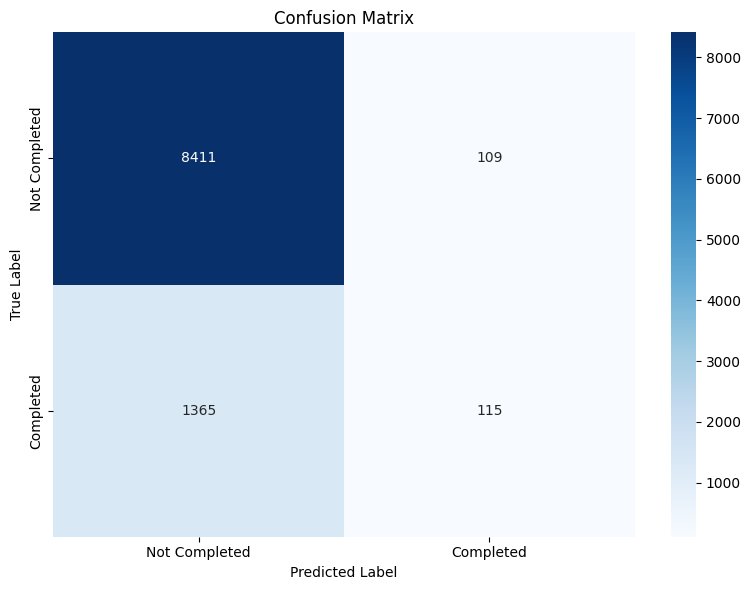

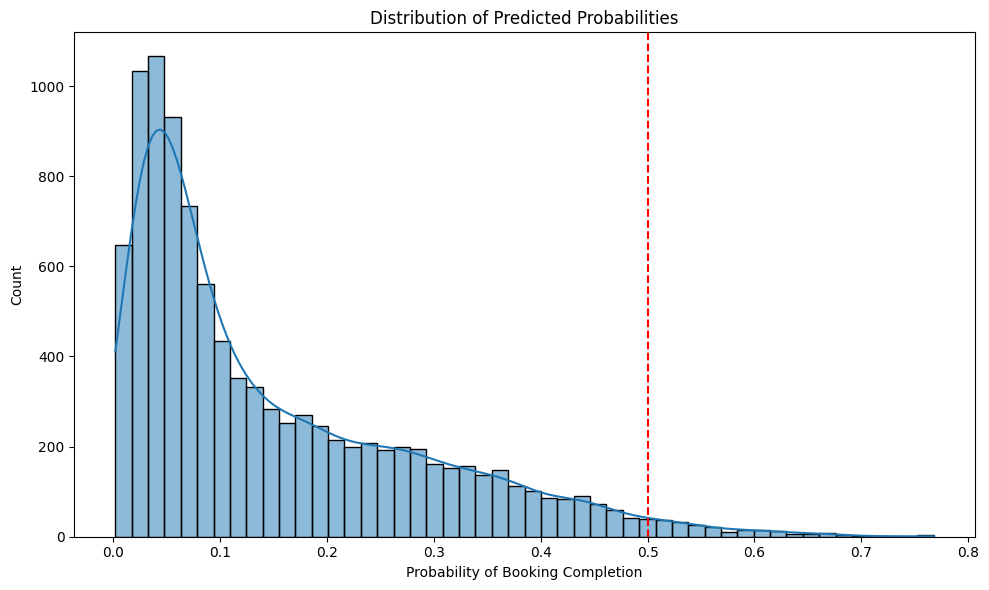


Model training and evaluation complete!


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop(columns="booking_complete")
y = df["booking_complete"]

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ],
    remainder="passthrough"  # keep numeric columns as they are
)

# Create a pipeline with logistic regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Train the model
print("\nTraining the logistic regression model...")
pipeline.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions on test set...")
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Model evaluation
print("\n--- MODEL EVALUATION ---")

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 2. Classification Report (properly formatted)
print("\nClassification Report:")
cr = classification_report(y_test, y_pred)
print(cr)

# 3. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Calculate and display additional metrics
tn, fp, fn, tp = cm.ravel()

# Class probabilities distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=50, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Booking Completion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\nModel training and evaluation complete!")